In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [13]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 11, 30)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2023-11-22,923.250000,925.200012,914.750000,922.750000,922.750000,12197979
2023-11-23,923.000000,925.349976,918.500000,923.000000,923.000000,5534614
2023-11-24,921.500000,930.400024,920.200012,929.400024,929.400024,7452002


In [15]:
df.shape

(472, 6)

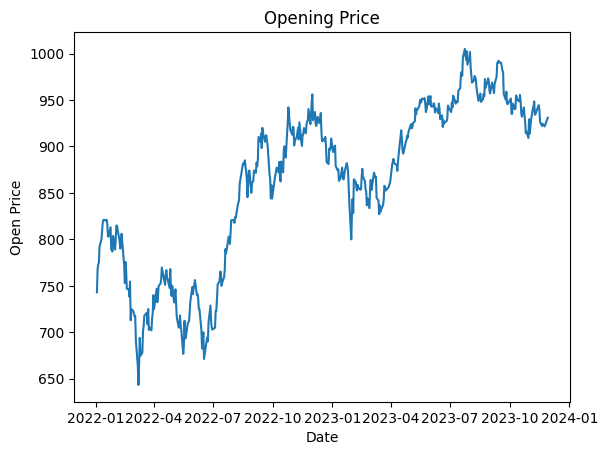

In [16]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

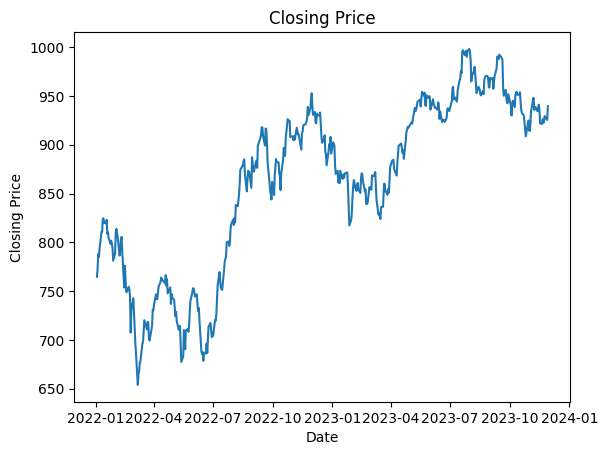

In [17]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Text(0.5, 0, 'Year')

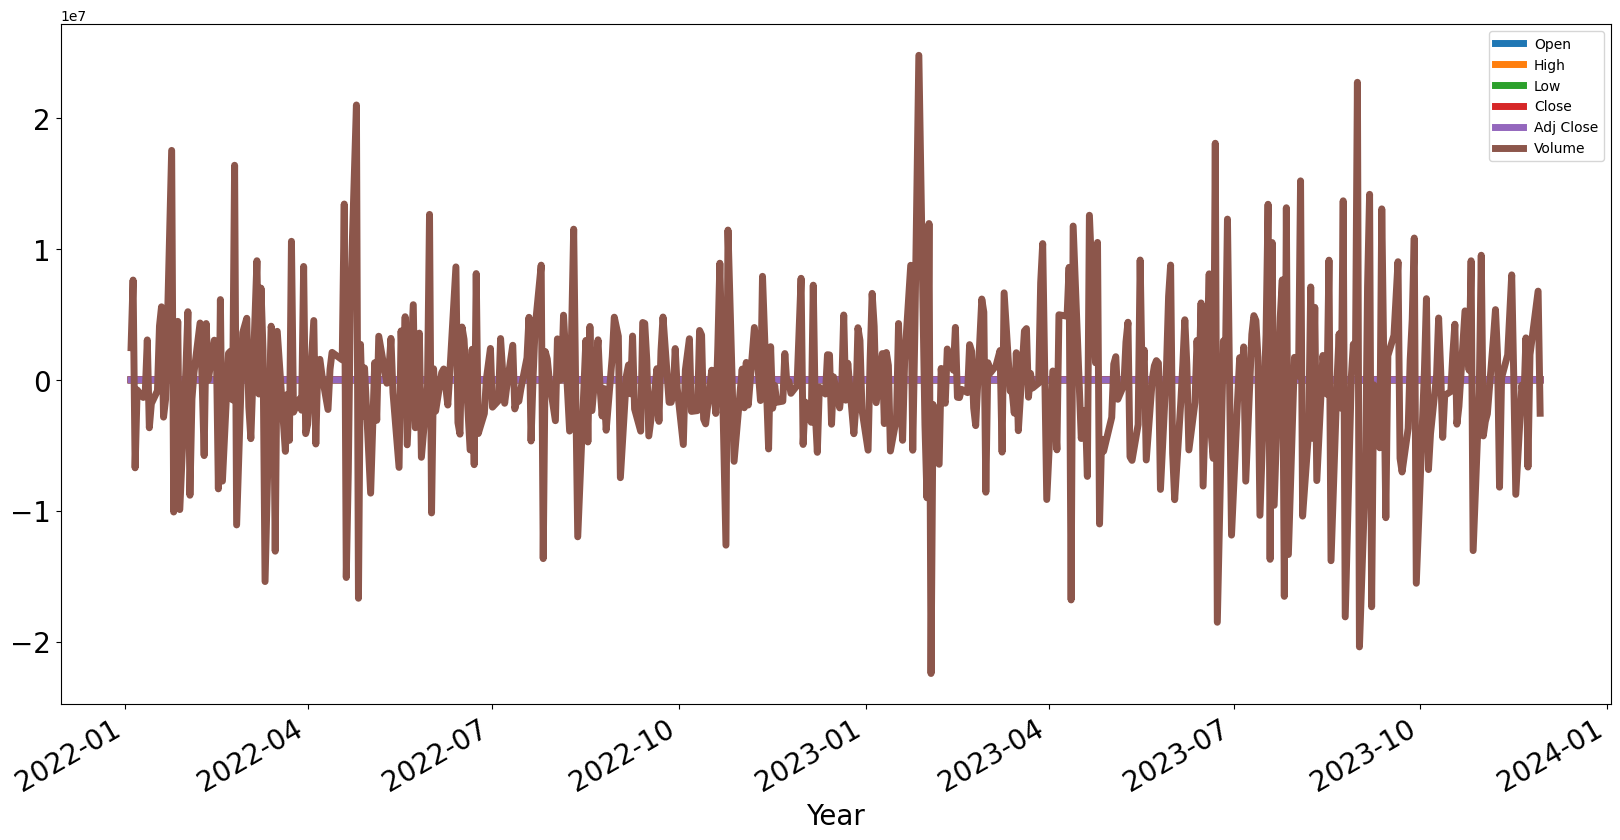

In [18]:
#First-order differencing
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'ICICIBANK Cumulative Returns')

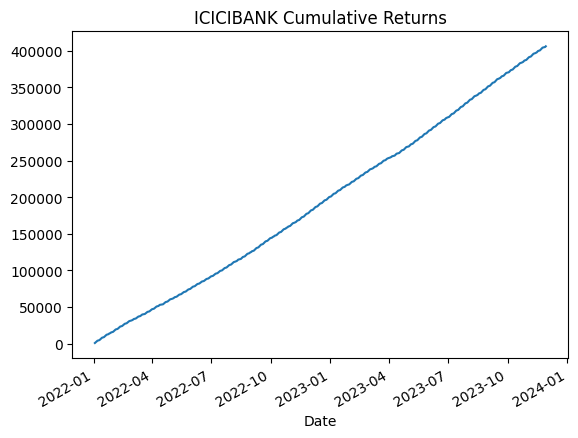

In [19]:
# Comulative Return
dr = df['Close'].cumsum()
dr.plot()
plt.title('ICICIBANK Cumulative Returns')

Text(0.5, 1.0, 'ICICIBANK Autocorrelation plot')

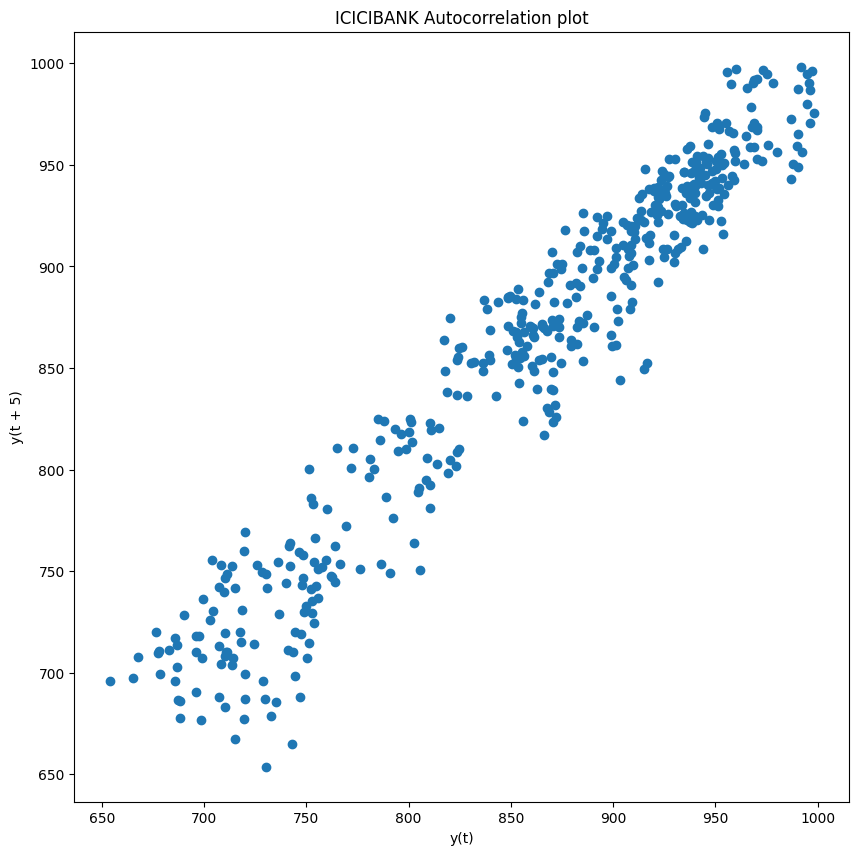

In [20]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('ICICIBANK Autocorrelation plot')

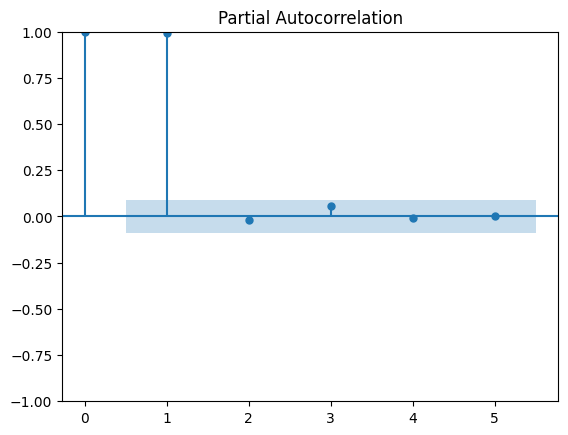

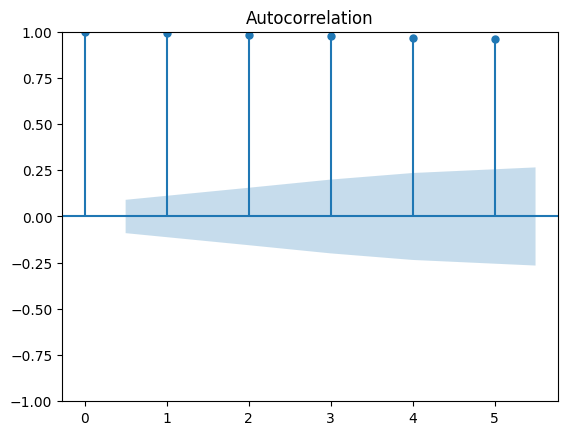

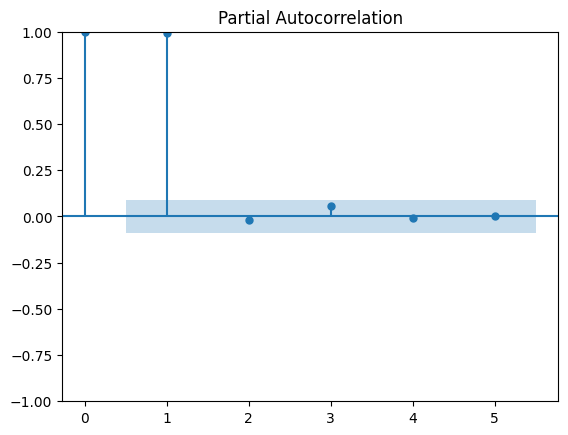

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=5)
plot_pacf(df['Close'], lags=5)

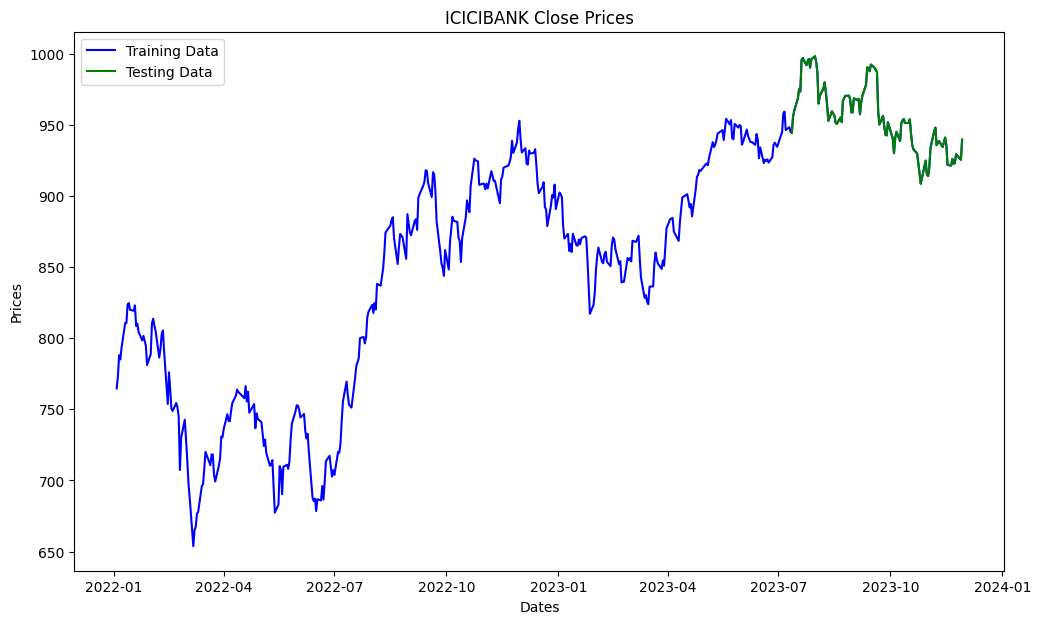

In [22]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [23]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (5, 2, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



In [24]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 64.527
SMAE: 0.642
RMSE: 8.032841967780717
MAE: 6.1251216407651485


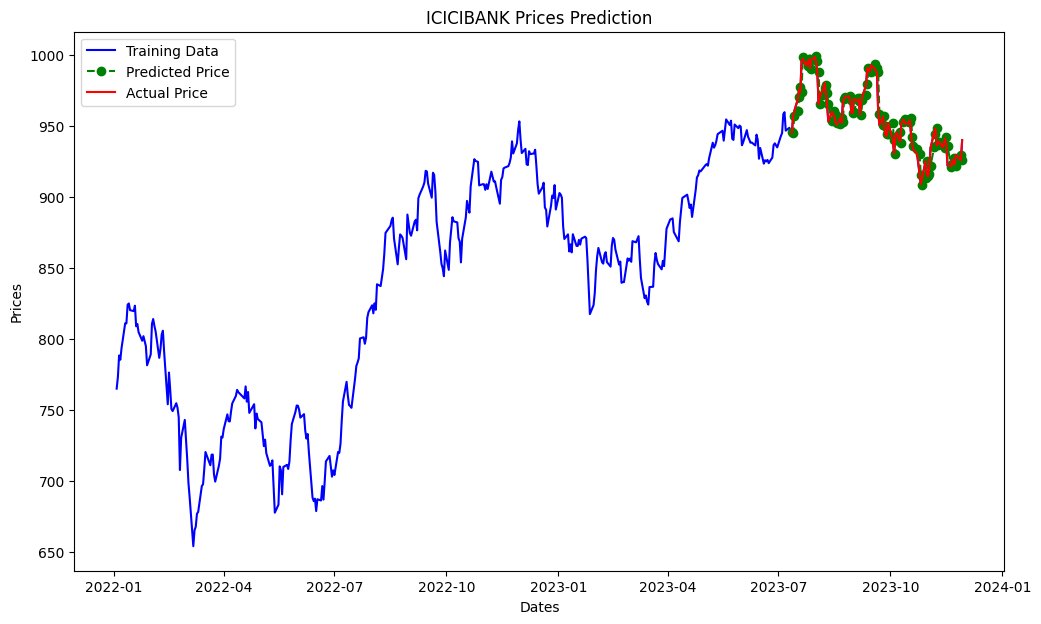

In [25]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

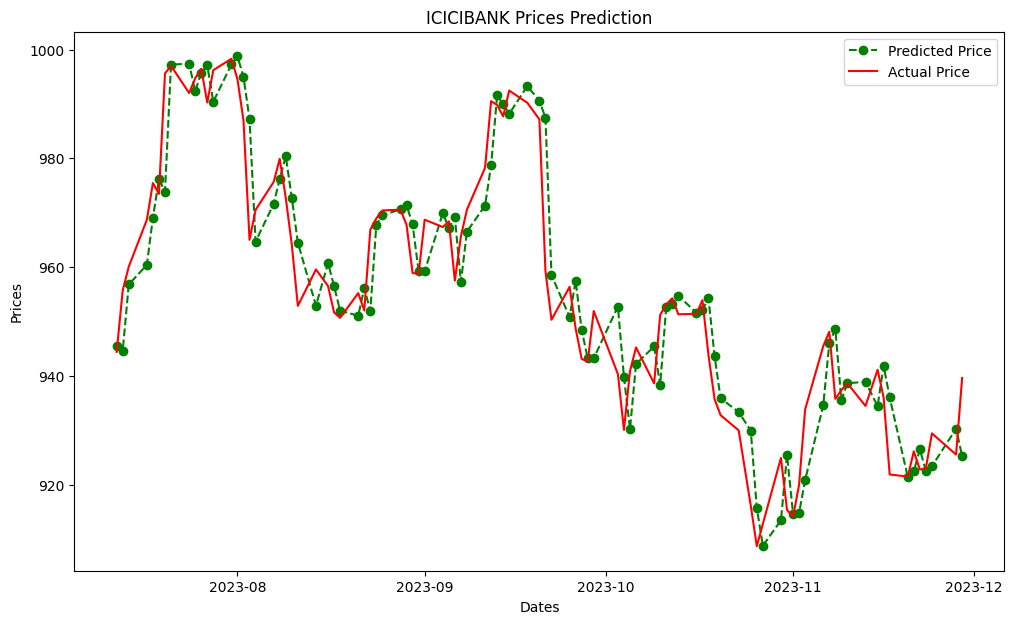

In [18]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [26]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

       Actual   Predicted
0  944.400024  945.125701
1  955.700012  944.394842
2  960.049988  956.408064
3  968.700012  960.131092
4  975.450012  969.886738
5  973.450012  977.080289
6  995.599976  973.465763
7  997.000000  998.043411
8  992.000000  996.445904
9  994.700012  992.124180


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [29]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the SARIMA model
order = (5, 1, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting one step ahead (for tomorrow)
forecast = model_fit.get_forecast(steps=1)
predicted_value_tomorrow = forecast.predicted_mean[0]

print('Predicted Stock Value for Tomorrow:', predicted_value_tomorrow)


Predicted Stock Value for Tomorrow: 945.3889432577487


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [30]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the SARIMA model
order = (5, 1, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting 60 days ahead
forecast = model_fit.get_forecast(steps=60)
predicted_values_60_days = forecast.predicted_mean

print('Predicted Stock Values for the Next 60 Days:', predicted_values_60_days)


Predicted Stock Values for the Next 60 Days: [945.38894326 944.97221415 945.85692495 945.29246258 945.71890217
 945.94257828 946.35473697 946.21422988 946.59923017 946.26791844
 946.49974969 947.80003714 947.77137234 948.22955519 947.5346353
 948.07941789 947.74841362 947.54277387 947.21515283 947.348941
 947.03604227 947.34557414 947.16954177 945.92810612 945.99251891
 945.54762882 946.23867734 945.71033233 946.05192022 946.23467213
 946.5695559  946.43012744 946.74816526 946.44212681 946.62794397
 947.793304   947.74903323 948.15930944 947.51894749 948.00891418
 947.69853299 947.51460653 947.20929515 947.33156768 947.04110531
 947.32202281 947.15597496 946.04187137 946.09317616 945.69586125
 946.31176782 945.83943123 946.14163665 946.30902821 946.60578091
 946.48325    946.76533459 946.49280672 946.65635278 947.70745636]
